In [37]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv("./data/train.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


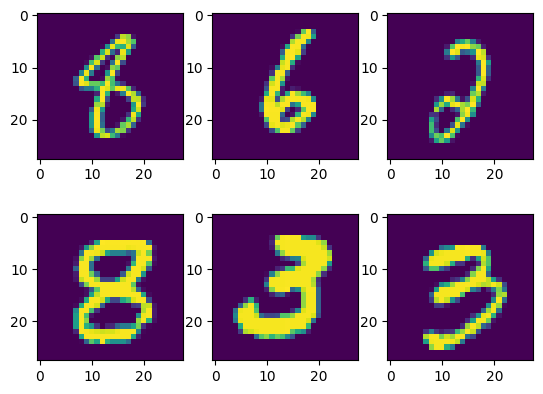

In [69]:
fig, ax = plt.subplots(2, 3)
for i in range(6):
    img = np.array(data.loc[random.randrange(0, 41999)][1:]).reshape((28, 28))
    ax[i//3, i%3].imshow(img)

In [70]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [71]:
# Testing Data
data_dev = data[:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

# Training Dta
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [75]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
Y_train

array([2, 5, 6, ..., 3, 6, 7], dtype=int64)

### Knowledge
Our NN will have a simple two-layer architecture. Input layer  a[0]
will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer  a[1]
will have 10 units with ReLU activation, and finally our output layer  a[2]
will have 10 units corresponding to the ten digit classes with softmax activation.

# Formulas

### Forward propagation

    Z[1]=W[1]X+b[1]
    
    A[1]=gReLU(Z[1]))
    
    Z[2]=W[2]A[1]+b[2]
    
    A[2]=gsoftmax(Z[2])
 
### Backward propagation

    dZ[2]=A[2]−Y
    
    dW[2]=1mdZ[2]A[1]T
    
    dB[2]=1mΣdZ[2]
    
    dZ[1]=W[2]TdZ[2].∗g[1]′(z[1])
    
    dW[1]=1mdZ[1]A[0]T
    
    dB[1]=1mΣdZ[1]
 
### Parameter updates

    W[2]:=W[2]−αdW[2]
    
    b[2]:=b[2]−αdb[2]
    
    W[1]:=W[1]−αdW[1]
    
    b[1]:=b[1]−αdb[1]

In [79]:
def neurons():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [81]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [82]:
def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z))
    return A

In [83]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [88]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [92]:
def ReLU_deriv(Z):
    return Z>0

In [102]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = (W2.T).dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [96]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [99]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [100]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [103]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = neurons()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10==0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [104]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 3 3 ... 3 5 3] [2 5 6 ... 3 6 7]
0.11121951219512195
Iteration:  10
[6 3 6 ... 3 6 3] [2 5 6 ... 3 6 7]
0.1734390243902439


C:\Users\User\AppData\Local\Temp\ipykernel_7232\2768927604.py:2: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / np.sum(np.exp(Z))
C:\Users\User\AppData\Local\Temp\ipykernel_7232\2768927604.py:2: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / np.sum(np.exp(Z))


Iteration:  20
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  30
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  40
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  50
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  60
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  70
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  80
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  90
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  100
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  110
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  120
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  130
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  140
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488
Iteration:  150
[0 0 0 ... 0 0 0] [2 5 6 ... 3 6 7]
0.09804878048780488


In [109]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _,  A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [107]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  2


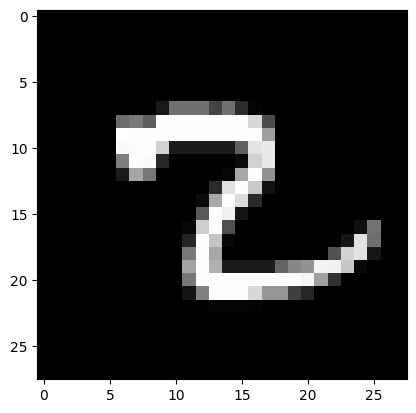

Prediction:  [0]
Label:  5


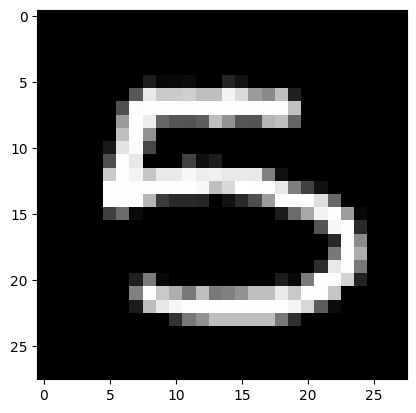

Prediction:  [0]
Label:  6


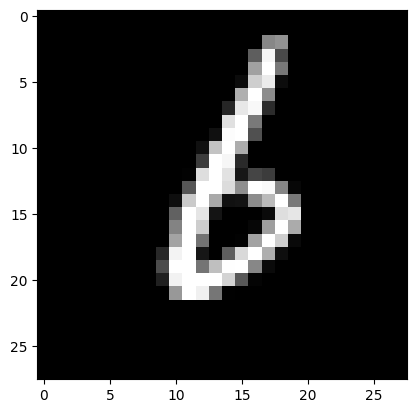

Prediction:  [0]
Label:  3


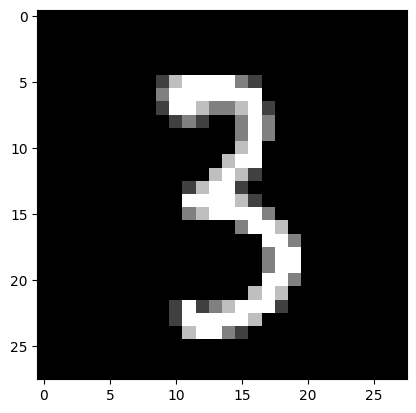

In [108]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)